In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import numpy as np 
import pandas as pd 
import xarray as xr

In [4]:
from cartopy import crs as ccrs

**NOTE**: need to run 
    
    
```
cdo settunits,days cmorph_monthly.nc cmorph_monthly_jan1998-jan2020.nc

```

in the `CDO` environment  

in order to set the calendar so that it can be read by xarray 

In [8]:
dset = xr.open_dataset('../CMORPH/cmorph_monthly_jan1998-jan2020.nc')

In [9]:
dset

<xarray.Dataset>
Dimensions:  (lat: 240, lon: 720, time: 265)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-15 1998-02-15 ... 2020-01-15
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float32 -59.75 -59.25 -58.75 -58.25 ... 58.75 59.25 59.75
Data variables:
    prcp     (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.9.7.1 (http:...
    history:                    Mon Jan 13 11:44:16 2020: cdo settunits,days ...
    institution:                NCEP/CPC
    Conventions:                CF-1.0
    title:                      CMORPH Version 1.0, RAW daily precip from 00Z...
    source_url:                 http://www.cpc.ncep.noaa.gov/products/janowia...
    reference:                  Joyce, R. J., J. E. Janowiak, P. A. Arkin, an...
    geospatial_lat_min:         -60.0
    geospatial_lat_max:         60.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.5
    geospatial_lon_resolution:  0.5
    time_coverage_start:        1998-01-01
    time_coverage_end:          2020-01-10
    climexp_url:                https://climexp.knmi.nl/select.cgi?cmorph_daily
    CDO:                        Climate Data Operators version 1.9.7.1 (http:...

In [ ]:
restrict the domain to [110.,-40.,280.,40.] 

In [16]:
dset = dset.sel(lat=slice(-40., 40.), lon=slice(110, 360 - 40))

In [17]:
clim = dset.sel(time=slice('1998','2018'))

In [18]:
clim = clim.groupby(clim.time.dt.month).mean('time')

In [19]:
clim

<xarray.Dataset>
Dimensions:  (lat: 160, lon: 420, month: 12)
Coordinates:
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 ... 38.75 39.25 39.75
  * lon      (lon) float32 110.25 110.75 111.25 111.75 ... 318.75 319.25 319.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    prcp     (month, lat, lon) float32 0.6418142 0.6038453 ... 5.261313

In [20]:
anoms = dset.groupby(dset.time.dt.month) - clim

In [21]:
anoms

<xarray.Dataset>
Dimensions:  (lat: 160, lon: 420, time: 265)
Coordinates:
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 ... 38.75 39.25 39.75
  * lon      (lon) float32 110.25 110.75 111.25 111.75 ... 318.75 319.25 319.75
  * time     (time) datetime64[ns] 1998-01-15 1998-02-15 ... 2020-01-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12 1
Data variables:
    prcp     (time, lat, lon) float32 1.1275463 1.1150784 ... 2.3341227 2.589088

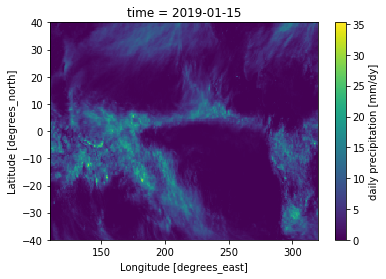

In [24]:
dset.sel(time='2019-01')['prcp'].plot()

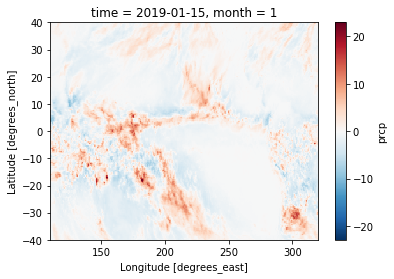

In [25]:
anoms.sel(time='2019-01')['prcp'].plot()

In [35]:
anoms_pp = dset.groupby(dset.time.dt.month) / clim

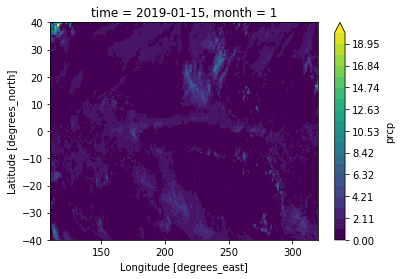

In [41]:
anoms_pp.sel(time='2019-01')['prcp'].plot(vmin=0, vmax=20, levels=20)

In [42]:
sector = dset.sel(lon=slice(150,180)).mean('lon')

In [43]:
sector 

<xarray.Dataset>
Dimensions:  (lat: 160, time: 265)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-15 1998-02-15 ... 2020-01-15
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 ... 38.75 39.25 39.75
Data variables:
    prcp     (time, lat) float32 2.0678105 2.1439905 ... 7.2986755 6.8702035

In [44]:
sector_m = sector.sel(time=slice('2018-01','2018-03')).mean('time')

In [54]:
sector_clim = clim.sel(lon=slice(150,180)).mean('lon')

In [56]:
sector_clim = sector_clim.sel(month=slice(1,3)).mean('month')

In [57]:
sector_clim

<xarray.Dataset>
Dimensions:  (lat: 160)
Coordinates:
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 ... 38.75 39.25 39.75
Data variables:
    prcp     (lat) float32 2.3455982 2.3786263 2.46304 ... 4.9036403 4.6404386

In [67]:
sector_m.sel(lat=slice(-30,20))['lat'].data

array([-29.75, -29.25, -28.75, -28.25, -27.75, -27.25, -26.75, -26.25,
       -25.75, -25.25, -24.75, -24.25, -23.75, -23.25, -22.75, -22.25,
       -21.75, -21.25, -20.75, -20.25, -19.75, -19.25, -18.75, -18.25,
       -17.75, -17.25, -16.75, -16.25, -15.75, -15.25, -14.75, -14.25,
       -13.75, -13.25, -12.75, -12.25, -11.75, -11.25, -10.75, -10.25,
        -9.75,  -9.25,  -8.75,  -8.25,  -7.75,  -7.25,  -6.75,  -6.25,
        -5.75,  -5.25,  -4.75,  -4.25,  -3.75,  -3.25,  -2.75,  -2.25,
        -1.75,  -1.25,  -0.75,  -0.25,   0.25,   0.75,   1.25,   1.75,
         2.25,   2.75,   3.25,   3.75,   4.25,   4.75,   5.25,   5.75,
         6.25,   6.75,   7.25,   7.75,   8.25,   8.75,   9.25,   9.75,
        10.25,  10.75,  11.25,  11.75,  12.25,  12.75,  13.25,  13.75,
        14.25,  14.75,  15.25,  15.75,  16.25,  16.75,  17.25,  17.75,
        18.25,  18.75,  19.25,  19.75], dtype=float32)

(0, 15)

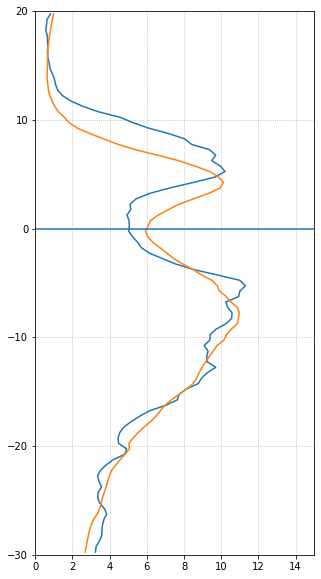

In [77]:
f, ax = plt.subplots(figsize=(5,10))
ax.plot(sector_m.sel(lat=slice(-30,20))['prcp'].data, sector_m.sel(lat=slice(-30,20))['lat'].data) 
ax.plot(sector_clim.sel(lat=slice(-30,20))['prcp'].data, sector_clim.sel(lat=slice(-30,20))['lat'].data) 
ax.set_ylim(-30, 20)
ax.grid(ls=':')
ax.axhline(0)
ax.set_xlim(0, 15)

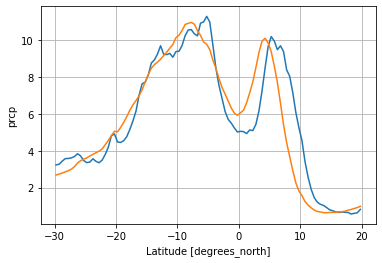

In [61]:
f, ax = plt.subplots()
sector_m.sel(lat=slice(-30,20))['prcp'].plot(ax=ax)
sector_clim.sel(lat=slice(-30,20))['prcp'].plot(ax=ax)
ax.grid()

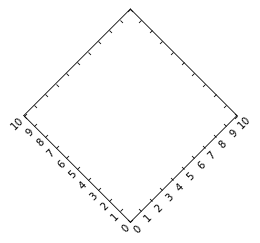

In [62]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

fig = plt.figure()

plot_extents = 0, 10, 0, 10
transform = Affine2D().rotate_deg(45)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents)
ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper)

fig.add_subplot(ax)
plt.show()